# Importing Necessary libraries

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Loading the dataset

In [103]:
df=pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


# performing descriptive analysis and descriptive statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  furnishingstatus  545 non-null    object
dtypes: int64(6), object(6)
memory usage: 51.2+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
df.shape

(545, 12)

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

In [7]:
#No null values

# Univariate Analysis

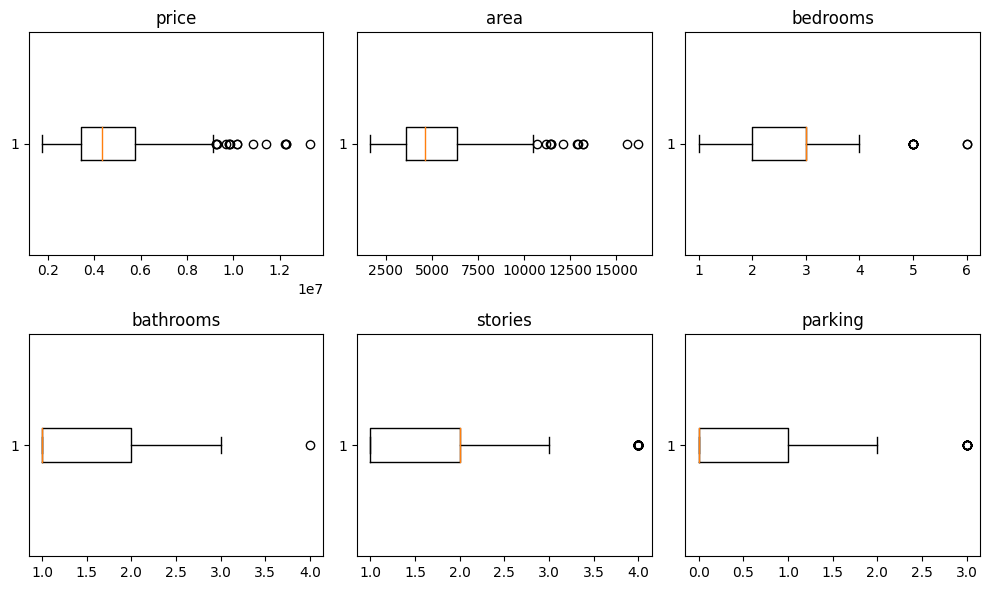

In [8]:
numeric_cols = df.select_dtypes(include='number').columns

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Flatten the axs array to iterate over each subplot
axs = axs.flatten()

# Create a boxplot for each numeric attribute
for i, col in enumerate(numeric_cols):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_title(col)

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()

### Removing Outliers

In [9]:
cols = ['price']
for col in cols:
    # Calculate the first and third quartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the rows that contain outliers
    up = np.where(df[col]>=upper_bound)
    lp = np.where(df[col]<=lower_bound)
    df = df.drop(up[0])
    df = df.drop(lp[0])

In [10]:
cols = ['area']
for col in cols:
    # Calculate the first and third quartiles
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the rows that contain outliers
    up = np.where(df[col]>=upper_bound)
    lp = np.where(df[col]<=lower_bound)
    df = df.drop(up[0])
    df = df.drop(lp[0])

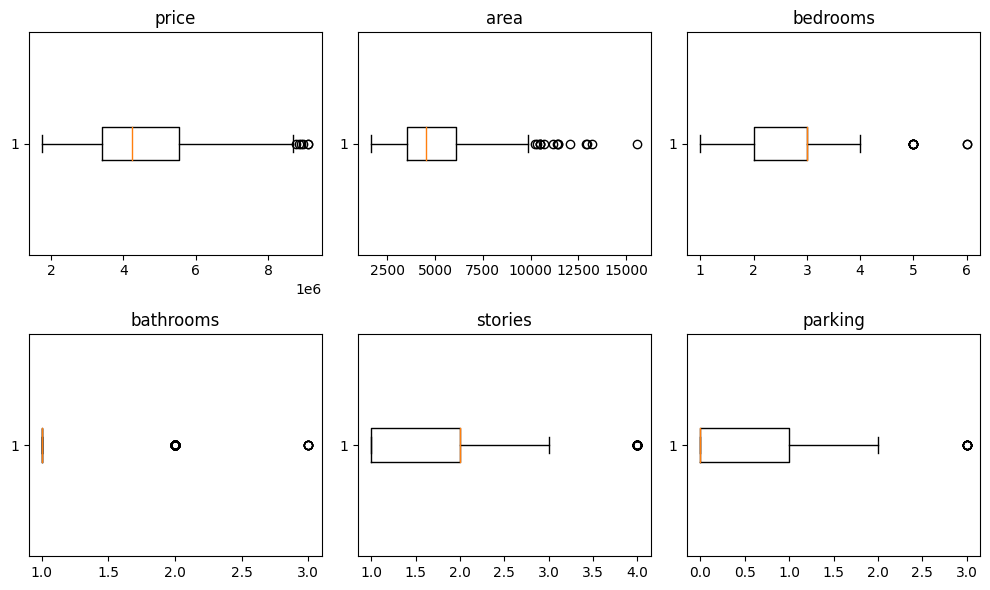

In [11]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 6))

# Flatten the axs array to iterate over each subplot
axs = axs.flatten()

# Create a boxplot for each numeric attribute
for i, col in enumerate(numeric_cols):
    axs[i].boxplot(df[col], vert=False)
    axs[i].set_title(col)

# Adjust the layout of subplots
plt.tight_layout()

# Show the plot
plt.show()


In [12]:
df.shape

(517, 12)

In [13]:
cat_cols = df.select_dtypes(include=['object', 'category'])
for i in cat_cols:
    print(df[i].value_counts())

mainroad
yes    440
no      77
Name: count, dtype: int64
guestroom
no     430
yes     87
Name: count, dtype: int64
basement
no     337
yes    180
Name: count, dtype: int64
hotwaterheating
no     495
yes     22
Name: count, dtype: int64
airconditioning
no     361
yes    156
Name: count, dtype: int64
furnishingstatus
semi-furnished    215
unfurnished       172
furnished         130
Name: count, dtype: int64


C:\Users\giris\AppData\Local\Temp\ipykernel_18444\3723050897.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'],hist=True,kde=True)


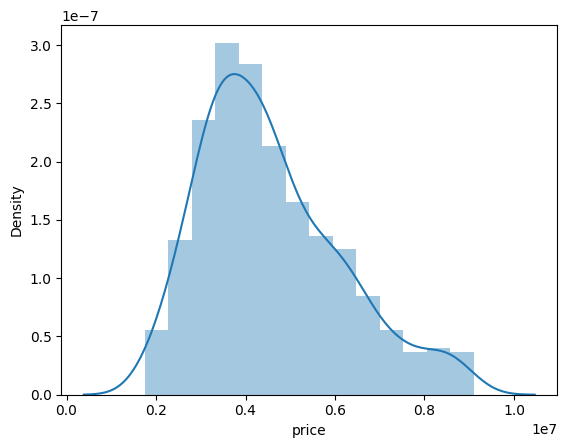

In [14]:
sns.distplot(df['price'],hist=True,kde=True)
plt.show()

In [15]:
df['price'].kurt()

0.08190497445111111

([<matplotlib.patches.Wedge at 0x25eaa6903a0>,
 [Text(0.2873902096652686, 1.061794173740162, 'semi-furnished'),
  Text(-0.9565030672897891, -0.5432328066908563, 'unfurnished'),
  Text(0.7742646605945193, -0.7813541036908004, 'furnished')],
 [Text(0.15675829618105558, 0.5791604584037245, '41.6%'),
  Text(-0.5217289457944304, -0.296308803649558, '33.3%'),
  Text(0.4223261785061014, -0.42619314746770925, '25.1%')])

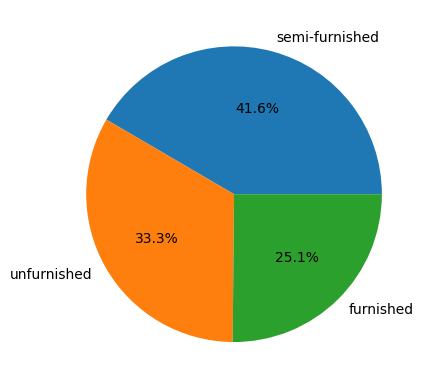

In [16]:
plt.pie(df["furnishingstatus"].value_counts(), labels=df["furnishingstatus"].value_counts().index, autopct='%1.1f%%')

# BiVariate Analysis

In [17]:
df.select_dtypes(include='number').corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.504651,0.338236,0.454315,0.437722,0.332136
area,0.504651,1.000000,0.113806,0.132527,0.073755,0.343760
bedrooms,0.338236,0.113806,1.000000,0.355933,0.407410,0.117971
bathrooms,0.454315,0.132527,0.355933,1.000000,0.314446,0.135443
stories,0.437722,0.073755,0.407410,0.314446,1.000000,0.037605
parking,0.332136,0.343760,0.117971,0.135443,0.037605,1.000000


<Axes: xlabel='bathrooms', ylabel='price'>

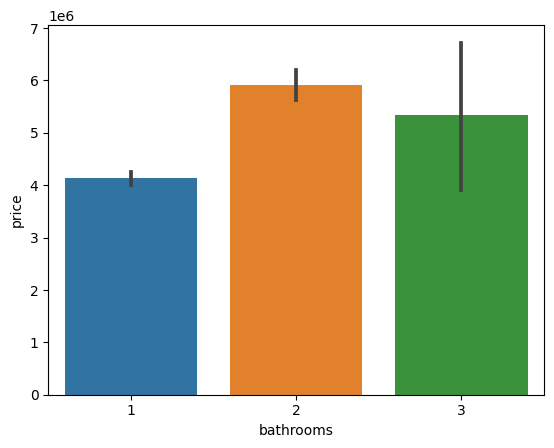

In [18]:
sns.barplot(data=df,x='bathrooms',y='price')

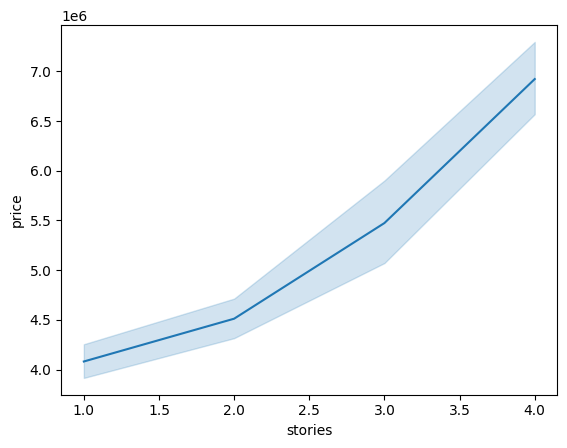

In [19]:
sns.lineplot(x='stories', y='price', data=df, )

plt.show()

<Axes: xlabel='area', ylabel='price'>

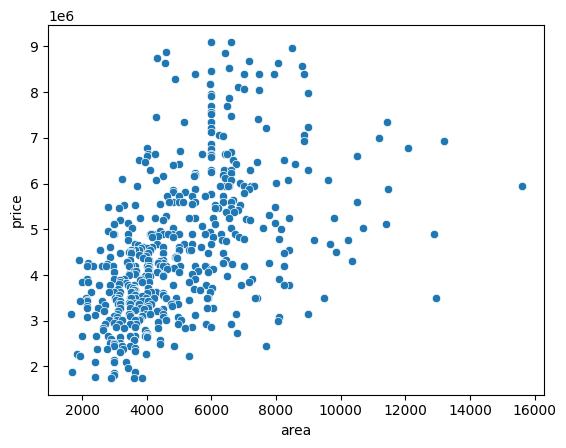

In [20]:
sns.scatterplot(data=df,x="area",y="price")

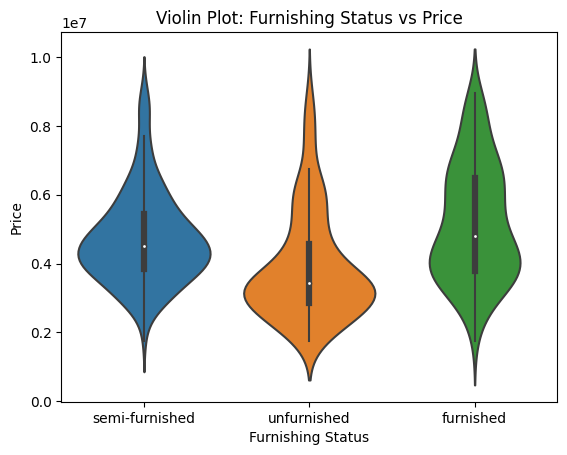

In [21]:
sns.violinplot(x='furnishingstatus', y='price', data=df)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.title('Violin Plot: ' + 'Furnishing Status' + ' vs ' + 'Price')
plt.show()

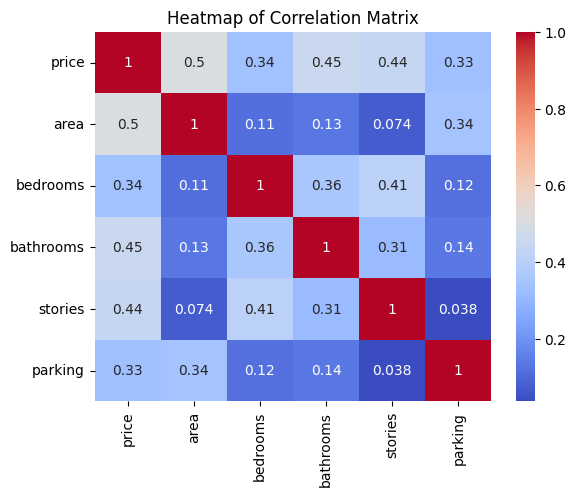

In [22]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# MultiVariate Visualisation

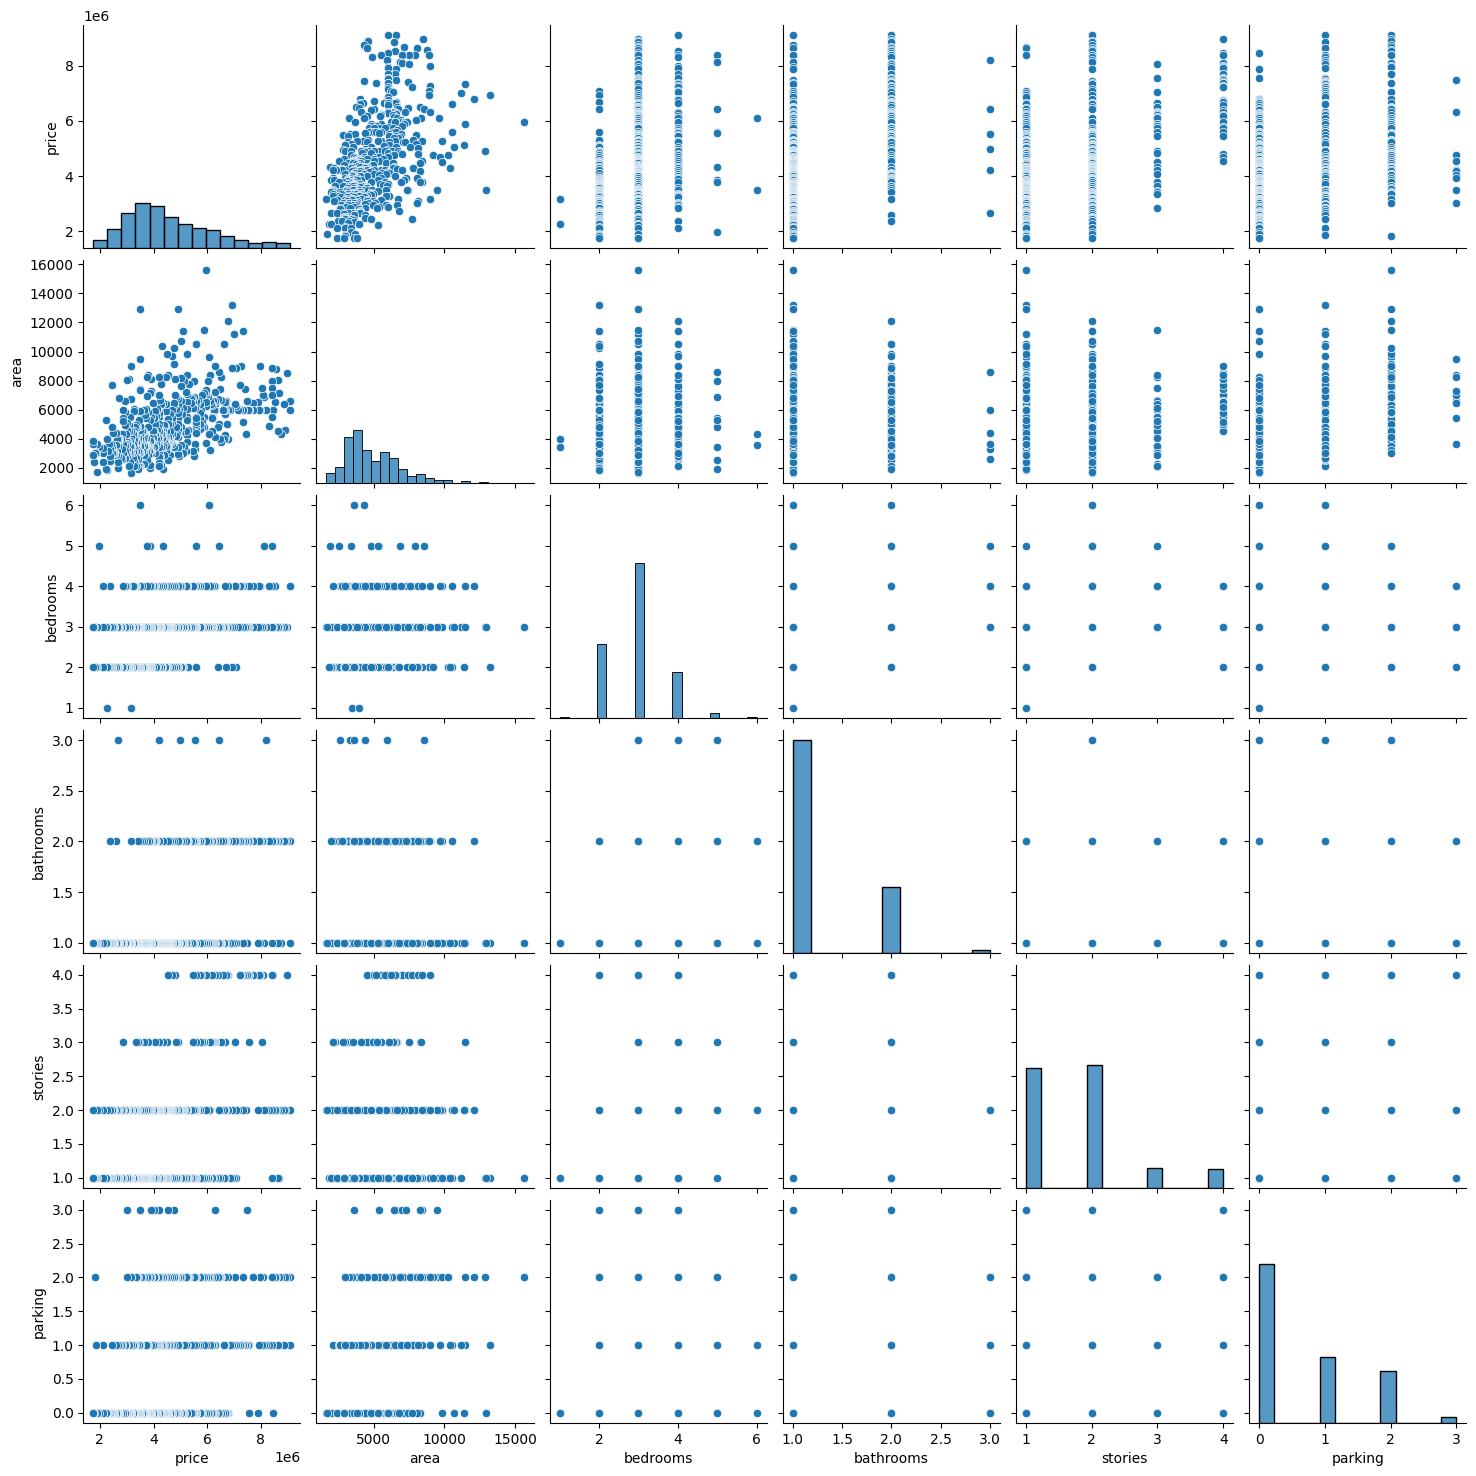

In [23]:
sns.pairplot(df)
plt.show()

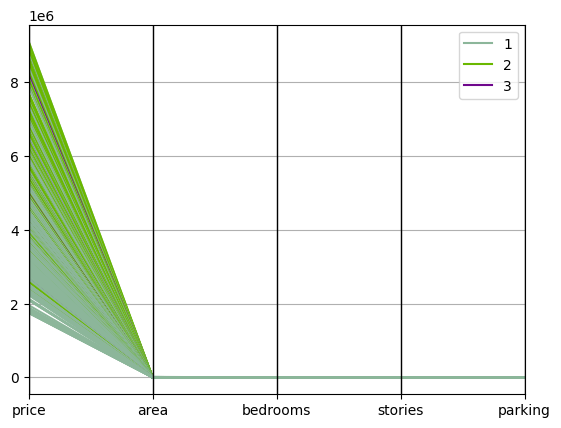

In [24]:
from pandas.plotting import parallel_coordinates


# Create a parallel coordinates plot
parallel_coordinates(df.select_dtypes(include='number'), 'bathrooms')
plt.show()

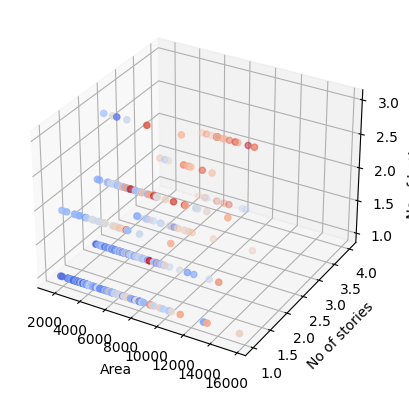

In [25]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['area'], df['stories'], df['bathrooms'], c=df['price'], cmap='coolwarm')
ax.set_xlabel('Area')
ax.set_ylabel('No of stories')
ax.set_zlabel('No of bathrooms')
plt.show()

# Encoding Categorical Columns

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
cat_columns = df.select_dtypes(include=['object']).columns


In [106]:
#Identifying categorical columns.
cat_columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'furnishingstatus'],
      dtype='object')

In [107]:
le = LabelEncoder()
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

In [108]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 517 entries, 15 to 544
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             517 non-null    int64
 1   area              517 non-null    int64
 2   bedrooms          517 non-null    int64
 3   bathrooms         517 non-null    int64
 4   stories           517 non-null    int64
 5   mainroad          517 non-null    int32
 6   guestroom         517 non-null    int32
 7   basement          517 non-null    int32
 8   hotwaterheating   517 non-null    int32
 9   airconditioning   517 non-null    int32
 10  parking           517 non-null    int64
 11  furnishingstatus  517 non-null    int32
dtypes: int32(6), int64(6)
memory usage: 40.4 KB


# Splitting the Data into dependent and independent Variables

In [35]:
from sklearn.model_selection import train_test_split

In [88]:
# dependent variable
y = df['price']

# independent variables
x = df.drop('price', axis=1)

# Train-test splitting and scaling

In [92]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)

# Scale both the training and testing sets using the scaler object
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Multiple Linear Regression

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

In [94]:
lr = LinearRegression()

In [95]:
lr.fit(X_train_scaled,y_train)
ypred = lr.predict(X_test_scaled)

In [96]:
mse = mean_squared_error(y_test,ypred)
r2 = r2_score(y_test,ypred)
mae = mean_absolute_error(y_test,ypred)

In [97]:
print("R2 score : ",r2)
print("Mean Squared Error : ",mse)
print("Mean Absolute Error : ",mae)

R2 score :  0.6908628802412169
Mean Squared Error :  900607506206.3438
Mean Absolute Error :  746032.19521175


# Random Forest Regression

In [73]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


In [75]:

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

In [78]:
r2 = r2_score(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("Random Forest Regression - MSE: ", mse_rf)
print("R2 score : ",r2)

Random Forest Regression - MSE:  947104080295.8632
R2 score :  0.674902745672461


# Gradient Boosting Regression

In [79]:
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Regression - MSE: ", mse_gb)

Gradient Boosting Regression - MSE:  992529445979.7596


In [80]:
r2 = r2_score(y_test,y_pred_gb)
print("R2 score : ",r2)

R2 score :  0.6593103076628539
